In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline
# the data path#To View the data go here: 
#https://github.com/drnesr/WaterConsumption/blob/master/data/SampleData.csv"
# To load the raw data:
remote_path = "https://raw.githubusercontent.com/drnesr/WaterConsumption/master/data/SampleData.csv"

df = pd.read_csv(remote_path)
df.head()

,Date,reference,target
0,15-01-2010,12.0,12.0
1,15-02-2010,18.0,18.0
2,15-03-2010,22.0,22.0
3,15-04-2010,26.0,26.0
4,15-05-2010,31.0,NaN


In [19]:
df.Date = pd.to_datetime(df.Date, format='%d-%m-%Y')
df = df.set_index('Date')
df.head()

,reference,target
Date,,
2010-01-15,12.0,12.0
2010-02-15,18.0,18.0
2010-03-15,22.0,22.0
2010-04-15,26.0,26.0
2010-05-15,31.0,NaN


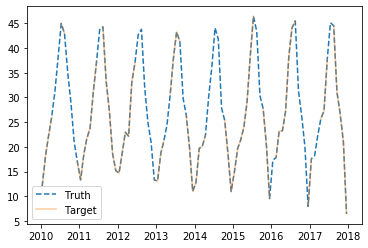

In [20]:
plt.plot(df['reference'], linestyle="--", label="Truth")
plt.plot(df['target'], label="Target", alpha=0.4)
plt.legend()

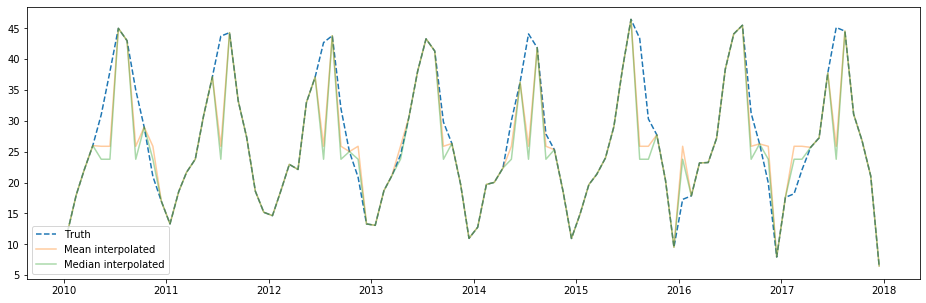

In [23]:
plt.figure(figsize=(16,5))
df= df.assign(mean=df.target.fillna(df.target.mean()))
df = df.assign(median=df.target.fillna(df.target.median()))
plt.plot(df['reference'], linestyle="--", label="Truth")
plt.plot(df['mean'], label="Mean interpolated", alpha=0.4)
plt.plot(df['median'], label="Median interpolated", alpha=0.4)
plt.legend()

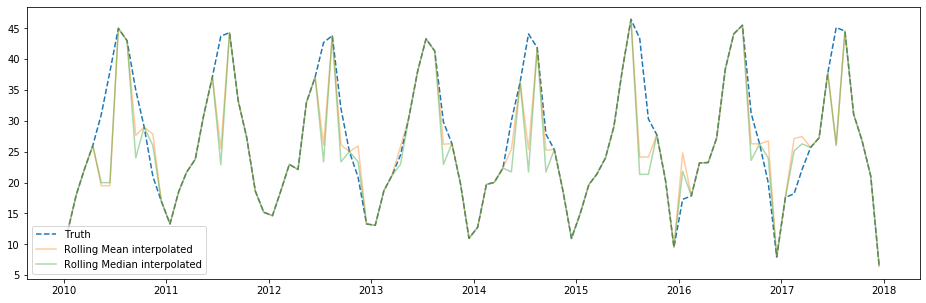

In [26]:
plt.figure(figsize=(16,5))
df = df.assign(rollingMean=df.target.fillna(df.target.rolling(24,min_periods=1,).mean()))
df = df.assign(rollingMedian=df.target.fillna(df.target.rolling(24,min_periods=1,).median()))
plt.plot(df['reference'], linestyle="--", label="Truth")
plt.plot(df['rollingMean'], label="Rolling Mean interpolated", alpha=0.4)
plt.plot(df['rollingMedian'], label="Rolling Median interpolated", alpha=0.4)
plt.legend()

In [27]:
df = df.assign(InterpolateLinear=df.target.interpolate(method='linear'))
df = df.assign(InterpolateTime=df.target.interpolate(method='time'))
df = df.assign(InterpolateQuadratic=df.target.interpolate(method='quadratic'))
df = df.assign(InterpolateCubic=df.target.interpolate(method='cubic'))
df = df.assign(InterpolateSLinear=df.target.interpolate(method='slinear'))
df = df.assign(InterpolateAkima=df.target.interpolate(method='akima'))
df = df.assign(InterpolatePoly5=df.target.interpolate(method='polynomial', order=5)) 
df = df.assign(InterpolatePoly7=df.target.interpolate(method='polynomial', order=7))
df = df.assign(InterpolateSpline3=df.target.interpolate(method='spline', order=3))
df = df.assign(InterpolateSpline4=df.target.interpolate(method='spline', order=4))
df = df.assign(InterpolateSpline5=df.target.interpolate(method='spline', order=5))

In [28]:
results = [(method, r2_score(df.reference, df[method])) for method in list(df)[3:]]
results_df = pd.DataFrame(np.array(results), columns=['Method', 'R_squared'])
results_df.sort_values(by='R_squared', ascending=False)

,Method,R_squared
8,InterpolateAkima,0.981684100149588
4,InterpolateTime,0.9815664478940275
7,InterpolateSLinear,0.9815664478940275
3,InterpolateLinear,0.9813215759943529
5,InterpolateQuadratic,0.9663474396797
11,InterpolateSpline3,0.9633836918698976
6,InterpolateCubic,0.9633218181089737
9,InterpolatePoly5,0.954157955951024
13,InterpolateSpline5,0.951671359314308
10,InterpolatePoly7,0.9504371542313383


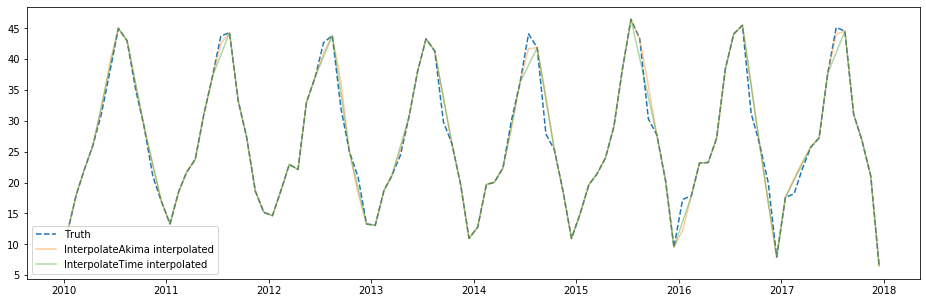

In [29]:
plt.figure(figsize=(16,5))
plt.plot(df['reference'], linestyle="--", label="Truth")
plt.plot(df['InterpolateAkima'], label="InterpolateAkima interpolated", alpha=0.4)
plt.plot(df['InterpolateTime'], label="InterpolateTime interpolated", alpha=0.4)
plt.legend()

In [45]:
supported_methods = ['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'polynomial', 'krogh', 'piecewise_polynomial', 'pchip', 'akima', 'spline', 'from_derivatives']
answers = []
for method in supported_methods:
    try:
        answers.append((method, r2_score(df.target.interpolate(method=method), df.reference)))
    except:
        print("Method %s failed" % method)
results_df = pd.DataFrame(np.array(results), columns=['Method', 'R_squared'])

results_df.sort_values(by='R_squared', ascending=False)

Method barycentric failed
Method polynomial failed
Method krogh failed
Method spline failed


/home/ayush/Projects/ml_env/lib/python3.6/site-packages/scipy/interpolate/polyint.py:511: RuntimeWarning: overflow encountered in multiply
  self.wi[:j] *= (self.xi[j]-self.xi[:j])
/home/ayush/Projects/ml_env/lib/python3.6/site-packages/scipy/interpolate/polyint.py:513: RuntimeWarning: divide by zero encountered in reciprocal
  self.wi **= -1
/home/ayush/Projects/ml_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ayush/Projects/ml_env/lib/python3.6/site-packages/scipy/interpolate/polyint.py:609: RuntimeWarning: invalid value encountered in true_divide
  p = np.dot(c,self.yi)/np.sum(c,axis=-1)[...,np.newaxis]
/home/ayush/Projects/ml_env/lib/python3.6/site-packages/scipy/interpolate/polyint.py:324: RuntimeWarning: overflow encountered in multiply
  pi = w*pi
/home/ayush/Projects/ml_env/lib/python3.6/site-packages/scipy/interpolate/polyint.py:325: RuntimeWarni

,Method,R_squared
8,InterpolateAkima,0.981684100149588
4,InterpolateTime,0.9815664478940275
7,InterpolateSLinear,0.9815664478940275
3,InterpolateLinear,0.9813215759943529
5,InterpolateQuadratic,0.9663474396797
11,InterpolateSpline3,0.9633836918698976
6,InterpolateCubic,0.9633218181089737
9,InterpolatePoly5,0.954157955951024
13,InterpolateSpline5,0.951671359314308
10,InterpolatePoly7,0.9504371542313383
